# EDA 

#### Pattern 1: Pedestrian injuries are more likely at night
- Plot pedestrian injury rate by hour.


In [79]:
import pandas as pd

In [80]:
df = pd.read_csv("../Data/cleaned_crash_data.csv")


In [81]:
df.shape

(340858, 43)

In [82]:
# lets see how many pedestrian injuries by hour
inj_by_hour = df.groupby('hour')['NUMBER OF PEDESTRIANS INJURED'].sum()
inj_by_hour = inj_by_hour.reset_index().sort_values('hour')
inj_by_hour


,hour,NUMBER OF PEDESTRIANS INJURED
0,0,1102
1,1,372
2,2,255
3,3,238
4,4,308
5,5,339
6,6,790
7,7,1271
8,8,1944
9,9,1388


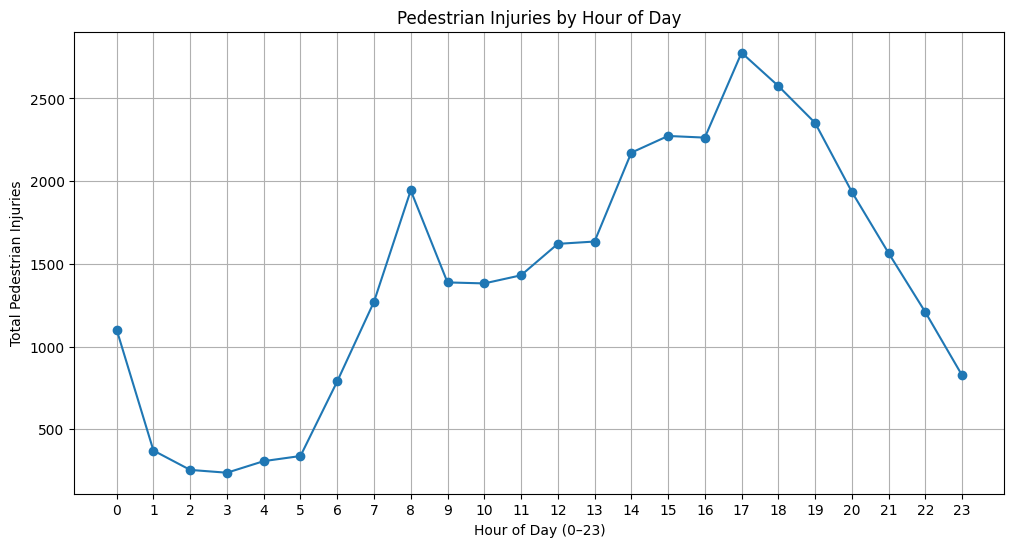

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(inj_by_hour['hour'], inj_by_hour['NUMBER OF PEDESTRIANS INJURED'], marker='o')
plt.title("Pedestrian Injuries by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Total Pedestrian Injuries")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


##### Pedestrian injuries follow a VERY clear daily rhythm.
- Early morning (1–5 AM)
    - Extremely low injury counts (200–400 range).
    - Makes sense: fewer cars, fewer pedestrians.
- Morning commute (7–9 AM)
    - Sharp increase.
    - The 8 AM spike is expected: rush hour chaos.
- Midday (10 AM–3 PM)
    - Stable, medium activity.
    - Afternoon peak (4–7 PM)
- Injuries surge HARD between 4–6 PM, peaking around 5–6 PM.
    - This is the highest injury period of the entire day.
    - Night decline (8 PM–midnight)
- Slowly tapers off but still higher than early morning.

##### Main takeaway: 
Pedestrian injuries are NOT highest in the early morning or late night -- they peak dramatically during the late afternoon rush (4–6 PM), when traffic density, pedestrian volume, and fatigue converge. Nighttime still carries elevated risk compared to early morning hours, but the most dangerous time for pedestrians is right after work.

0–5   = Overnight  
6–9   = Morning commute  
10–15 = Midday  
16–19 = Evening commute  
20–23 = Night


/var/folders/v2/9k8drrwj5h39kpr935vvx6j80000gn/T/ipykernel_13358/977344714.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('hour_bin')['NUMBER OF PEDESTRIANS INJURED']


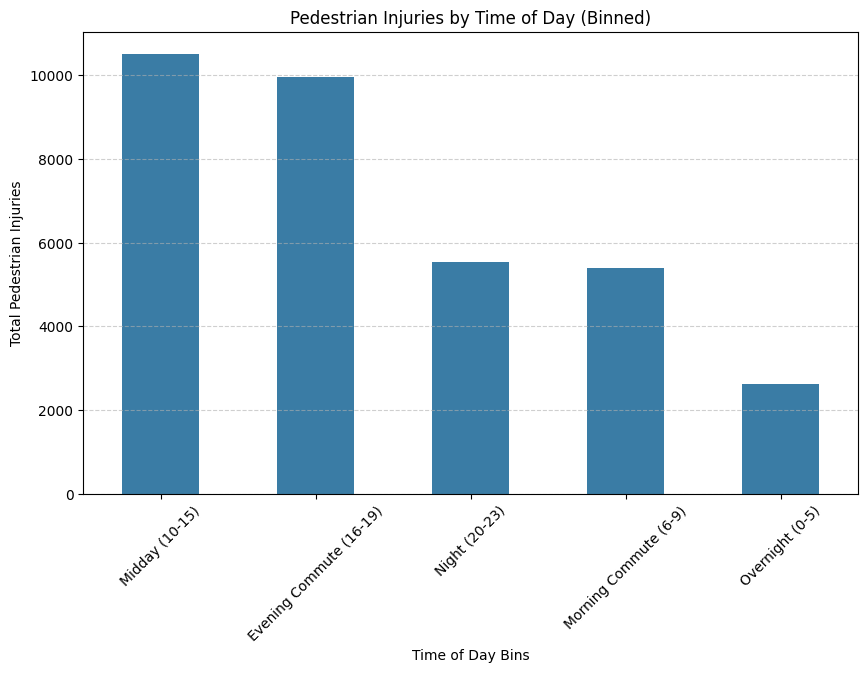

In [84]:
# create bins to group time of days together for better visualization
# Define bins and labels
bins = [-1, 5, 9, 15, 19, 23]
labels = ['Overnight (0-5)', 
          'Morning Commute (6-9)', 
          'Midday (10-15)', 
          'Evening Commute (16-19)', 
          'Night (20-23)']

# create a new column
df['hour_bin'] = pd.cut(df['hour'], bins=bins, labels=labels)

bin_summary = (
    df.groupby('hour_bin')['NUMBER OF PEDESTRIANS INJURED']
      .sum()
      .sort_values(ascending=False)
)

bin_summary

bin_summary.plot(kind='bar', figsize=(10,6), color='#3A7CA5')

plt.title("Pedestrian Injuries by Time of Day (Binned)")
plt.ylabel("Total Pedestrian Injuries")
plt.xlabel("Time of Day Bins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


In [85]:
df.groupby('BoroName')['NUMBER OF PEDESTRIANS INJURED'] \
  .sum() \
  .sort_values(ascending=False)


BoroName
Brooklyn         11533
Queens            8585
Manhattan         6845
Bronx             5588
Staten Island     1470
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [86]:
df.groupby(['hour', 'BoroName'])['NUMBER OF PEDESTRIANS INJURED'] \
  .sum() \
  .unstack() \
  .fillna(0)


BoroName,Bronx,Brooklyn,Manhattan,Queens,Staten Island
hour,,,,,
0,210,385,249,226,32
1,60,116,110,80,6
2,52,79,68,47,9
3,40,77,62,56,3
4,56,96,66,89,1
5,57,114,56,100,12
6,152,218,132,237,51
7,204,409,224,346,88
8,356,643,328,532,85


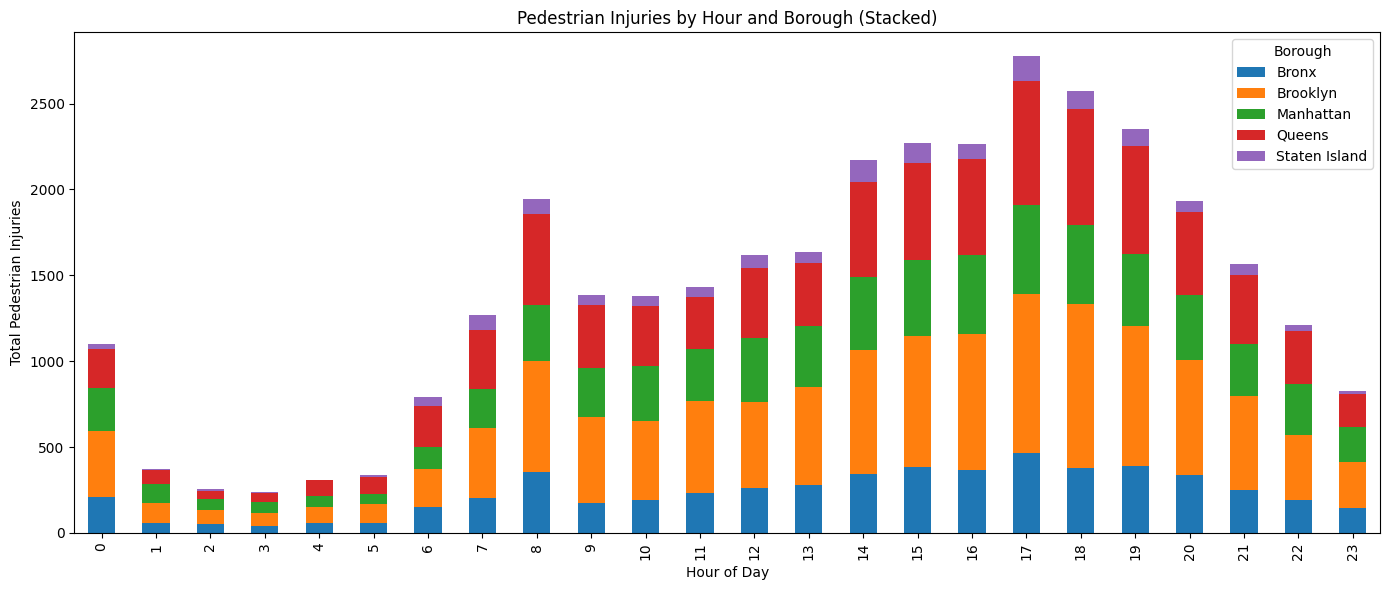

In [87]:
pivot = df.groupby(['hour', 'BoroName'])['NUMBER OF PEDESTRIANS INJURED'] \
          .sum() \
          .unstack() \
          .fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(14,6))

plt.title("Pedestrian Injuries by Hour and Borough (Stacked)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Pedestrian Injuries")
plt.legend(title="Borough")
plt.tight_layout()
plt.show()

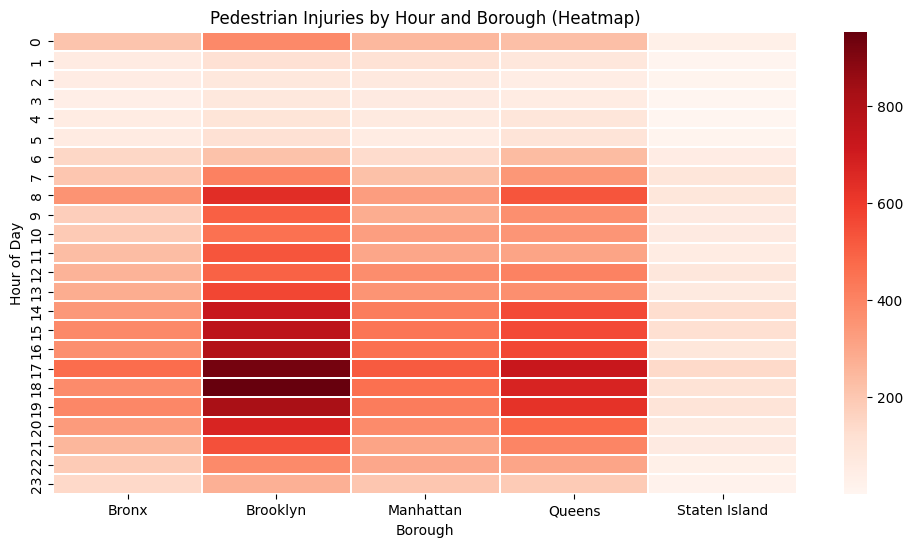

In [88]:
import seaborn as sns
plt.figure(figsize=(12,6))

heat = sns.heatmap(
    pivot,
    cmap="Reds",
    linewidths=0.3,
    linecolor="white"
)

plt.title("Pedestrian Injuries by Hour and Borough (Heatmap)")
plt.xlabel("Borough")
plt.ylabel("Hour of Day")
plt.show()


### Insight from heatmap
The heatmap reveals clear and meaningful patterns in when and where pedestrian injuries occur in New York City.

1. Brooklyn consistently shows the highest pedestrian injury counts
    - Across almost every hour of the day, Brooklyn is the brightest (deepest red) on the heatmap.
    - This indicates that Brooklyn contributes the largest share of pedestrian injury crashes citywide.
    - Why this matters: Brooklyn has dense commercial corridors, heavy foot traffic, and wide multi-lane avenues -- all risk factors known to increase pedestrian exposure.

2. Evening commute (4–7 PM) is the most dangerous period citywide
    - Every borough shows a strong rise in pedestrian injuries between 16:00 and 19:00, with Brooklyn and Queens spiking the most.
    - Possible explanations:
        - Increased pedestrian activity as people leave work and school
        - Higher vehicle volumes during rush hour
        - Reduced driver attention and fatigue at the end of the day
    - Implication for Vision Zero:
        - PM commute hours should be a primary window for targeted enforcement, daylighting, and signal timing improvements.

Main takeway: 
- Pedestrian injury risk increases sharply during the evening commute, particularly in Brooklyn and Queens.
- This suggests Vision Zero should prioritize:
    - targeted traffic calming on Brooklyn and Queens arterials
    - automated enforcement during peak hours
    - pedestrian visibility improvements (daylighting, leading pedestrian intervals)
    - PM rush-hour focused outreach and enforcement campaigns

In [89]:
df.keys()

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'hour', 'month', 'day_of_week', 'index_right', 'BoroCode', 'BoroName',
       'Shape_Leng', 'Shape_Area', 'Type code 1', 'Type code 1 lower',
       'count vehicles', 'veh_type', 'veh_group', 'num_vehicles', 'hour_bin'],
      dtype='ob

In [90]:
df.groupby('veh_group')['NUMBER OF PEDESTRIANS INJURED'].sum().sort_values(ascending=False)


veh_group
sedan         12092
suv           10765
other          5069
bike           1556
truck          1359
taxi           1228
motorcycle     1111
bus             600
van             241
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [91]:
# Cross vehicle type × borough (which borough has the most danger?)
veh_boro = df.groupby(['BoroName', 'veh_group'])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack(fill_value=0)

veh_boro

veh_group,bike,bus,motorcycle,other,sedan,suv,taxi,truck,van
BoroName,,,,,,,,,
Bronx,135,110,229,1025,1970,1702,166,214,37
Brooklyn,441,199,338,1805,4135,3860,211,457,87
Manhattan,755,134,307,883,1981,1725,703,292,65
Queens,213,132,231,1174,3344,2987,141,314,49
Staten Island,12,25,6,182,662,491,7,82,3


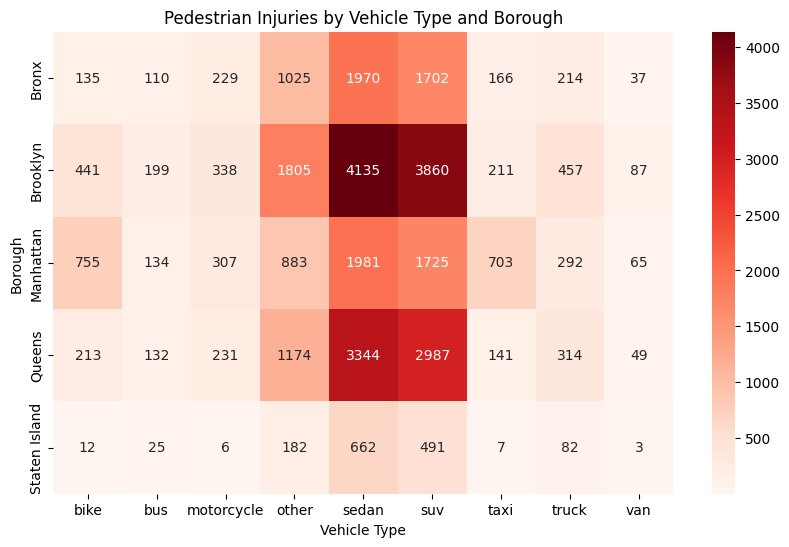

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(veh_boro, annot=True, fmt='g', cmap='Reds')
plt.title("Pedestrian Injuries by Vehicle Type and Borough")
plt.xlabel("Vehicle Type")
plt.ylabel("Borough")
plt.show()


Factor 1: Vehicle type --especially SUVs and sedans

SUVs + sedans cause the majority of pedestrian injuries across every borough.

Factor 2: Borough differences

Brooklyn is the worst overall, especially for SUVs and sedans.
Queens is especially dangerous for trucks.
Manhattan has massive sedan-related injuries.

Factor 3: Geography + traffic patterns

Dense areas → more sedan crashes
Wide-road outer boroughs → more SUV + truck crashes

In [93]:
df['veh_group'].value_counts()

veh_group
sedan         156082
suv           117341
truck          17863
other          13886
taxi            9788
bike            9211
motorcycle      7906
bus             6632
van             2149
Name: count, dtype: int64

/var/folders/v2/9k8drrwj5h39kpr935vvx6j80000gn/T/ipykernel_13358/2505441833.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=veh_inj.values, y=veh_inj.index, palette=colors)


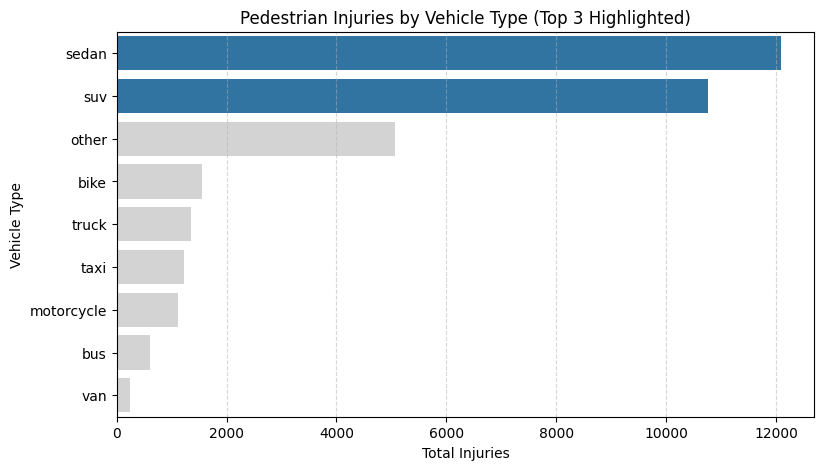

In [94]:
import numpy as np

veh_inj = df.groupby('veh_group')['NUMBER OF PEDESTRIANS INJURED'].sum() \
            .sort_values(ascending=False)

# Identify top 2
top2 = veh_inj.index[:2]

# Assign colors
colors = []
for vg in veh_inj.index:
    if vg in top2:
        colors.append("#1f77b4")  # blue for top 2
    else:
        colors.append("#d3d3d3")  # light grey for others

plt.figure(figsize=(9, 5))
sns.barplot(x=veh_inj.values, y=veh_inj.index, palette=colors)

plt.title("Pedestrian Injuries by Vehicle Type (Top 3 Highlighted)")
plt.xlabel("Total Injuries")
plt.ylabel("Vehicle Type")
plt.grid(axis='x', linestyle='--', alpha=0.5)
    
plt.show()


<Figure size 1000x600 with 0 Axes>

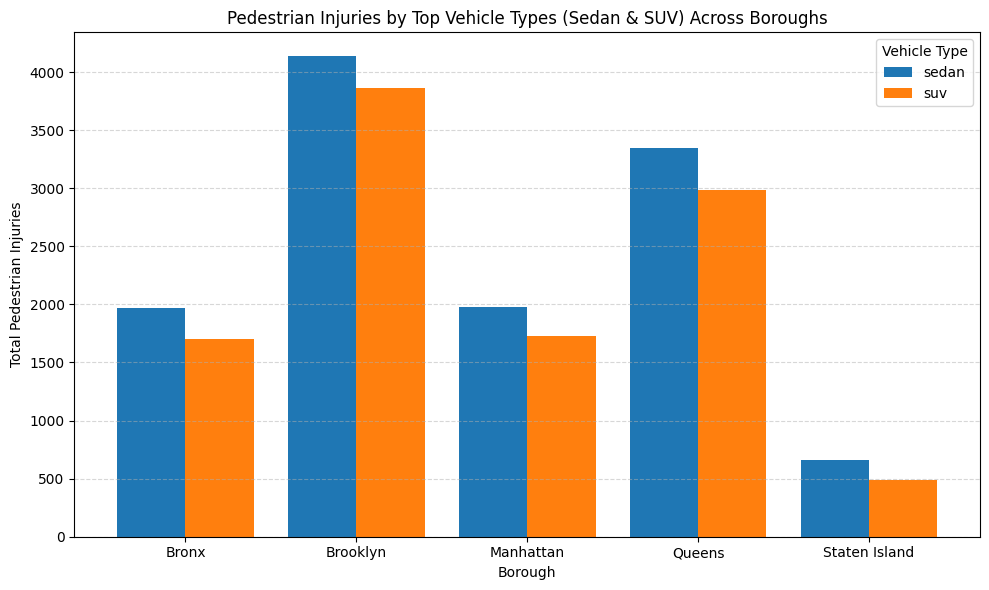

In [95]:
# Get the top 2 most harmful vehicle groups
top2 = veh_inj.index[:2]      # sedan, suv
df_top2 = df[df['veh_group'].isin(top2)]

# Pivot for borough × vehicle type
boro_veh = df_top2.pivot_table(
    index='BoroName',
    columns='veh_group',
    values='NUMBER OF PEDESTRIANS INJURED',
    aggfunc='sum'
)

# Plot
plt.figure(figsize=(10,6))
boro_veh.plot(kind='bar', figsize=(10,6), width=0.8)

plt.title("Pedestrian Injuries by Top Vehicle Types (Sedan & SUV) Across Boroughs")
plt.xlabel("Borough")
plt.ylabel("Total Pedestrian Injuries")
plt.xticks(rotation=0)
plt.legend(title="Vehicle Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### EDA on contributing factors 1

In [96]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           84820
Unspecified                                              84363
Failure to Yield Right-of-Way                            24008
Following Too Closely                                    18927
Passing or Lane Usage Improper                           14430
Unsafe Speed                                             12182
Passing Too Closely                                      11933
Backing Unsafely                                         10582
Other Vehicular                                          10532
Traffic Control Disregarded                               9725
Turning Improperly                                        8109
Driver Inexperience                                       7227
Alcohol Involvement                                       6364
Unsafe Lane Changing                                      6331
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     3937
Reaction to Uninvolved Ve

In [97]:
df['CONTRIBUTING FACTOR VEHICLE 1'].isnull().sum()

np.int64(2382)

In [98]:
df['cf1_clean'] = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower().fillna("unspecified")

In [99]:
df_cf = df[df['cf1_clean'] != "unspecified"].copy()

In [100]:
cf_inj = (
    df_cf.groupby('cf1_clean')['NUMBER OF PEDESTRIANS INJURED']
    .sum()
    .sort_values(ascending=False)
)


In [101]:
df_cf = df_cf.merge(
    cf_inj.rename("cf1_injury_total"),
    left_on="cf1_clean",
    right_index=True,
    how="left"
)


In [ ]:
df_cf[['cf1_clean', 'cf1_injury_total']].head()


,cf1_clean,cf1_injury_total
1,turning improperly,354
2,driver inexperience,358
4,driver inattention/distraction,8520
5,driver inattention/distraction,8520
6,driver inattention/distraction,8520


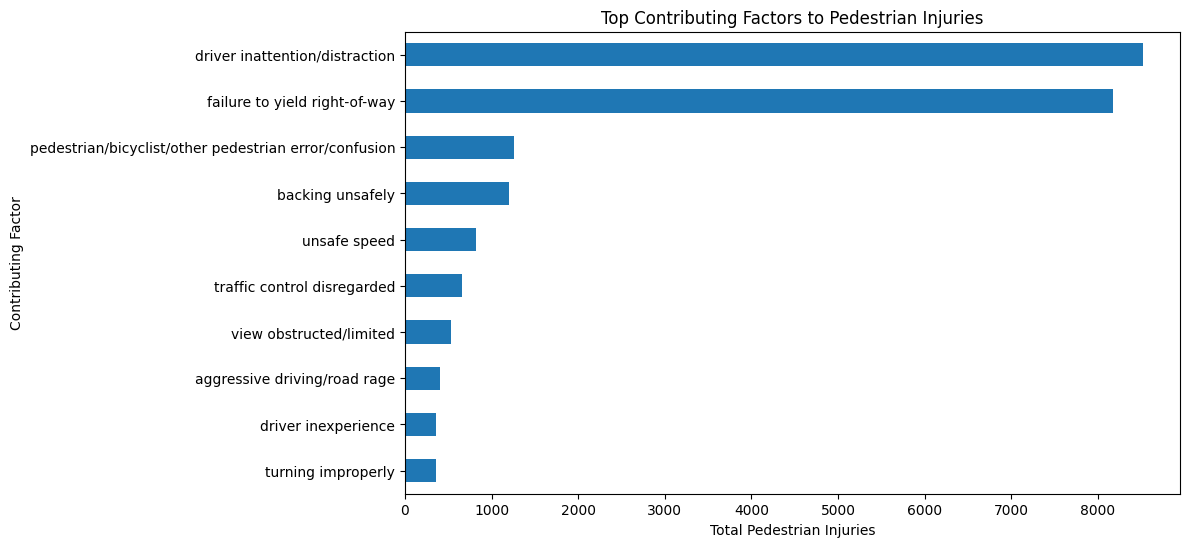

In [103]:
cf_inj.head(10).plot(kind="barh", figsize=(10,6))
plt.title("Top Contributing Factors to Pedestrian Injuries")
plt.xlabel("Total Pedestrian Injuries")
plt.ylabel("Contributing Factor")
plt.gca().invert_yaxis()
plt.show()


In [104]:
# def clean_cf(cf):
#     if pd.isna(cf):
#         return "unspecified"
    
#     cf = cf.lower().strip()

#     # group distractions
#     if cf in ["cell phone (hand-held)", "cell phone (hands-free)", "texting",
#               "using on board navigation device", "other electronic device",
#               "eating or drinking", "listening/using headphones", "pedestrian/bicyclist/other pedestrian error/confusion"]:
#         return "driver distraction (device/food)"
#     #
#     # mechanical failures
#     if cf in ["brakes defective", "accelerator defective", "steering failure",
#               "tire failure/inadequate", "headlights defective", "other lighting defects", "windshield inadequate"]:
#         return "mechanical failure"
    
#     # medical issues
#     if cf in ["illnes", "illness", "lost consciousness", "physical disability", "prescription medication"]:
#         return "medical/physical impairment"
    
#     # Sleepy/drowsy
#     if cf in ["fatigued/drowsy", "asleep", "fell asleep"]:
#         return "driver fatigue/drowsiness"
    
#     # road/environment
#     if cf in ["pavement slippery", "pavement defective", "glare", "obstruction/debris"]:
#         return "road/environment hazard"
    
#     # alcohol/drugs
#     if cf in ["alcohol involvement", "drugs (illegal)"]:
#         return "alcohol/drugs"
    
#     # everything else stays as is
#     return cf


### Quick note on other vehicular
- When a driver hits a pedestrian, and the other vehicle (not the striking vehicle) did something unsafe that contributed to the crash, but that unsafe behavior doesn’t match a standard code, they mark it as other vehicular


#### Documentation on process
- Insights: Contributing Factors in Pedestrian Injury Crashes
    - Our analysis of NYC pedestrian-injury crashes shows that behavioral factors from drivers account for the overwhelming majority of incidents. After cleaning and grouping the contributing-factor column (CF1), removing noise such as "unspecified", and summing injuries per factor, the patterns become very clear:

1. Driver inattention/distraction is the #1 cause
    - This category includes texting, phone use, eating, navigation-device use, and general distraction.
        - It accounts for the highest number of pedestrian injuries, far above every other category.
    - What this means:
        - Pedestrian injuries are strongly tied to preventable driver behaviors.
        - Vision Zero interventions should continue focusing on distracted driving enforcement, public education campaigns, and street designs that minimize high-conflict interactions.

2. Failure to yield right-of-way is a major systemic issue
    - This factor is the second-highest contributor to pedestrian injuries.
    - Typical scenarios:
    - Drivers not yielding at intersections
        - Dangerous left/right turns
        - Crosswalk violations
    - What this means:
        - Intersections deserve special attention. Automated enforcement, redesigned crossings, and turn-calming treatments would directly target one of the largest drivers of harm.

3. Close-following and improper lane usage also matter
    - Factors such as:
        - Following too closely
        - Improper lane usage
        - Unsafe speed
        - While not as large as the first two categories, these behaviors cluster around aggressive or impatient driving, which elevates pedestrian risk especially during busy hours.
    - What this means:
        - Traffic-calming (speed bumps, narrower lanes) + neighborhood slow zones would help reduce these crash types.

4. Environmental and mechanical issues are relatively rare
    - Categories like:
        - Pavement defects
        - Slippery roads
        - Vehicle mechanical failures
    - occur far less frequently and are not major contributors to injury patterns compared to human behavior.

- Policy impact: Road-condition improvements matter, but behavioral interventions will save more lives

### EDA on weekday column

In [105]:
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"], errors="coerce")
df["weekday"] = df["CRASH DATE"].dt.day_name()

In [106]:

# Summarize injuries by weekday
inj_by_weekday = (
    df.groupby('weekday')['NUMBER OF PEDESTRIANS INJURED']
      .sum()
      .sort_values(ascending=False)
)

inj_by_weekday



weekday
Friday       5593
Thursday     5440
Wednesday    5417
Tuesday      5159
Monday       4937
Saturday     4047
Sunday       3428
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

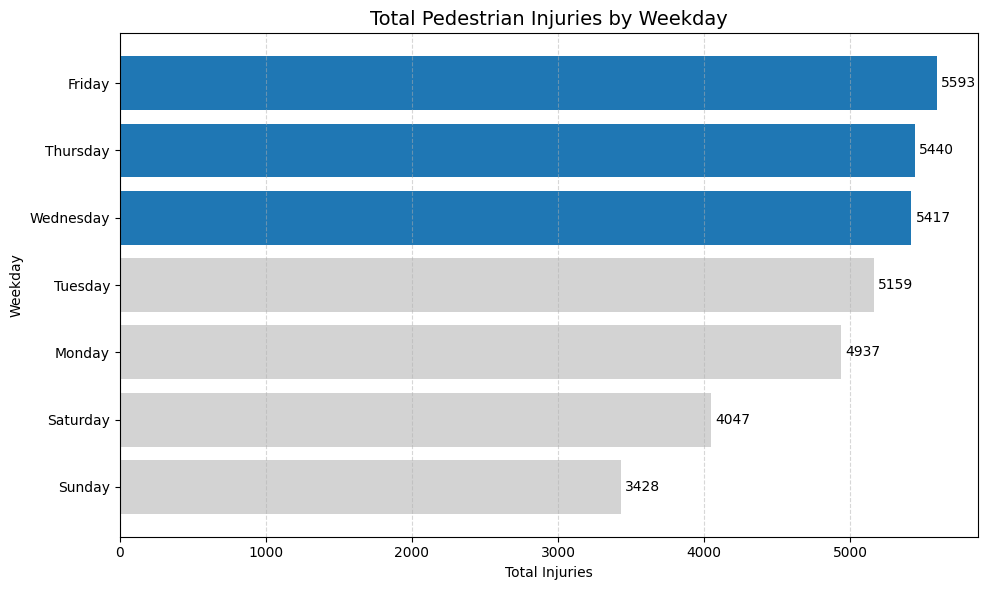

In [107]:
inj_sorted = inj_by_weekday  # already sorted descending

# top 3 days
top3 = inj_sorted.index[:3]

# color palette
colors = ["#1f77b4" if day in top3 else "#d3d3d3" for day in inj_sorted.index]

plt.figure(figsize=(10,6))

bars = plt.barh(inj_sorted.index, inj_sorted.values, color=colors)

plt.title("Total Pedestrian Injuries by Weekday", fontsize=14)
plt.xlabel("Total Injuries")
plt.ylabel("Weekday")

plt.gca().invert_yaxis()  # highest at top
plt.grid(axis='x', linestyle='--', alpha=0.5)

# add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 30, bar.get_y() + bar.get_height()/2,
             f"{int(width)}",
             va='center')

plt.tight_layout()
plt.show()


In [108]:
df = df_cf.copy()


In [109]:
df.to_csv("../Data/cleaned_for_modeling.csv", index=False)